In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [88]:
df = pd.read_csv('Datasets/zomato.csv')

In [89]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

### Dropping unnecessary columns

##### Here in the dataset columns like url,reviews_list,menu_item,address,phone,dish_liked are not important

In [91]:
df.drop(['url','reviews_list','menu_item','address','phone','dish_liked'],axis=1,inplace=True)

In [92]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [93]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'approx_cost(for two people)',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

#### Renaming Columns for better readability

In [94]:
df.rename(columns={'name':'restaurants','rate':'rating','cuisines':'food_type','listed_in(type)':'type','listed_in(city)':'city','approx_cost(for two people)':'cost'},inplace=True)

In [95]:
df.columns

Index(['restaurants', 'online_order', 'book_table', 'rating', 'votes',
       'location', 'rest_type', 'food_type', 'cost', 'type', 'city'],
      dtype='object')

### Dropping Nan Values

In [96]:
df.isnull().sum()

restaurants        0
online_order       0
book_table         0
rating          7775
votes              0
location          21
rest_type        227
food_type         45
cost             346
type               0
city               0
dtype: int64

In [97]:
df.dropna(inplace = True)

In [98]:
df.isnull().sum()

restaurants     0
online_order    0
book_table      0
rating          0
votes           0
location        0
rest_type       0
food_type       0
cost            0
type            0
city            0
dtype: int64

### Cleaning Individual Columns

In [99]:
# we are grouping the restaurants to see the restaurant names and their count.
df.groupby('restaurants').count().head() 

,online_order,book_table,rating,votes,location,rest_type,food_type,cost,type,city
restaurants,,,,,,,,,,
#FeelTheROLL,2,2,2,2,2,2,2,2,2,2
#L-81 Cafe,9,9,9,9,9,9,9,9,9,9
#refuel,3,3,3,3,3,3,3,3,3,3
1000 B.C,6,6,6,6,6,6,6,6,6,6
100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,3,3,3,3,3,3,3,3,3,3


##### Here we can see we are got restaurant names having disturbed characters
##### so we need to remove that characters from the name using pattern matcing to get orignal names.

In [100]:
# '[Ãx][^A-Za-z]+' pattern I got to find disturbed characters using regex.And Replacing those charachters with empty space. 
df['restaurants']=df['restaurants'].str.replace('[Ãx][^A-Za-z]+','',regex=True)

In [101]:
df.groupby('restaurants').count().head()

,online_order,book_table,rating,votes,location,rest_type,food_type,cost,type,city
restaurants,,,,,,,,,,
#FeelTheROLL,2,2,2,2,2,2,2,2,2,2
#L-81 Cafe,9,9,9,9,9,9,9,9,9,9
#refuel,3,3,3,3,3,3,3,3,3,3
1000 B.C,6,6,6,6,6,6,6,6,6,6
100C,3,3,3,3,3,3,3,3,3,3


##### Here see we successfully removed the disturbed characters from restaurant name(refer 5th row to see transformation)

##### By reading the databse I found the some names have incorrect spelling. Let me correct them as well.

In [102]:
# replacing the Caf- or Caf names with cafe using pattern matching
df['restaurants']=df['restaurants'].str.replace('Caf-|Caf ','Cafe ',regex=True) 

In [103]:
# Using .unique() we can find the unique values from column
df['online_order'].unique()

array(['Yes', 'No'], dtype=object)

In [104]:
df['book_table'].unique()

array(['Yes', 'No'], dtype=object)

In [105]:
df['rating'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

##### Here, we can see rating column having string values and having object datatype including 'NEW' and '-' values. we know that rating is always out of 5 and in decimal format. So, we need to clean our 'rating' columns.
##### Remove 'NEW' and '-' values.
##### Remove '/5' from the rating.
##### Convert datatype object to float (float_datatype has decimal values).

In [106]:
# lambda function to replace /5 to empty string
replace=lambda x:x.replace('/5',"") 
# list to store cleaned values
l=[] 
#map function to read data from column and replace /5 to empty string
for val in map(replace, df['rating']): 
    if val!='NEW' and val!='-': # excluding 'NEW' and '-' values
        var=float(val) # converting the result in float datatype and storing into one variable
    l.append(var) # appending cleaned values in created list
df['rating']=l  # updating rating column with new and cleaned values

In [107]:
df['rating'].unique(),df['rating'].dtype

(array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
        4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2, 2.3,
        4.8, 4.9, 2.1, 2. , 1.8]),
 dtype('float64'))

In [108]:
df['votes'].isnull().value_counts() # checking column having null values or not using .isnull()

votes
False    43533
Name: count, dtype: int64

In [109]:
df.location.unique() # This syntax is works similer like previous so don't be confuse.

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Bannerghatta Road', 'BTM', 'Kanakapura Road', 'Bommanahalli',
       'CV Raman Nagar', 'Electronic City', 'Wilson Garden',
       'Shanti Nagar', 'Koramangala 5th Block', 'Richmond Road', 'HSR',
       'Marathahalli', 'Koramangala 7th Block', 'Bellandur',
       'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'MG Road', 'Brigade Road', 'Lavelle Road',
       'Church Street', 'Ulsoor', 'Residency Road', 'Shivajinagar',
       'Infantry Road', 'St. Marks Road', 'Cunningham Road',
       'Race Course Road', 'Commercial Street', 'Vasanth Nagar', 'Domlur',
       'Koramangala 8th Block', 'Ejipura', 'Jeevan Bhima Nagar',
       'Old Madras Road', 'Seshadripuram', 'Kammanahalli',
       'Koramanga

In [110]:
df.rest_type.unique(), df.rest_type.isnull().value_counts()

(array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
        'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
        'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
        'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
        'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
        'Dessert Parlor, Sweet Shop', 'Bakery, Quick Bites',
        'Sweet Shop, Quick Bites', 'Kiosk', 'Food Truck',
        'Quick Bites, Dessert Parlor', 'Beverage Shop, Quick Bites',
        'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
        'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
        'Quick Bites, Bakery', 'Microbrewery, Casual Dining', 'Lounge',
        'Bar, Casual Dining', 'Food Court', 'Cafe, Bakery', 'Dhaba',
        'Quick Bites, Sweet Shop', 'Microbrewery',
        'Food Court, Quick Bites', 'Quick Bites, Beverage Shop',
        'Pub, Bar', 'Casual Dining, Pub', 'Lounge, Bar',
        'Dessert Parlor, Quick Bites

In [111]:
df.food_type.unique(), df.food_type.isnull().value_counts()

(array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
        'Cafe, Mexican, Italian', ..., 'Tibetan, Nepalese',
        'North Indian, Street Food, Biryani',
        'North Indian, Chinese, Arabian, Momos'], dtype=object),
 food_type
 False    43533
 Name: count, dtype: int64)

In [112]:
df.cost.unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

#### Changes need:

##### Remove ',' from values
##### Change datatype object to integer(int)

In [113]:
 # we can also apply lambda function using .apply()
df['cost']= df['cost'].apply(lambda x:x.replace(",","")).astype(int)

In [114]:
df.type.unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [115]:
df.city.unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

#### Removing Duplicates

In [116]:
# By using .duplicated() we can see duplicate values from our dataset.
df.duplicated().value_counts() 

False    43453
True        80
Name: count, dtype: int64

##### We got 80 duplicate values in our dataset we need to remove those.

In [117]:
# dropping duplicates values using .drop_duplicates()
df.drop_duplicates(keep='last',inplace=True)

df.reset_index(drop=True,inplace=True) # reseting index

In [118]:
df.duplicated().value_counts()

False    43453
Name: count, dtype: int64

In [119]:
df.head()

,restaurants,online_order,book_table,rating,votes,location,rest_type,food_type,cost,type,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43453 entries, 0 to 43452
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   restaurants   43453 non-null  object 
 1   online_order  43453 non-null  object 
 2   book_table    43453 non-null  object 
 3   rating        43453 non-null  float64
 4   votes         43453 non-null  int64  
 5   location      43453 non-null  object 
 6   rest_type     43453 non-null  object 
 7   food_type     43453 non-null  object 
 8   cost          43453 non-null  int64  
 9   type          43453 non-null  object 
 10  city          43453 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 3.6+ MB


In [121]:
df.to_csv('zomato_clean_data.csv') # Saivng cleaned dataset in output directory.

#### Data Visualization
##### In data visualization we going to visualize our data how it is, and trying to find some informative data from our dataset.

#### Univariate Analysis 

##### 1.How many Restaurants are accepting Online Orders for zomato?

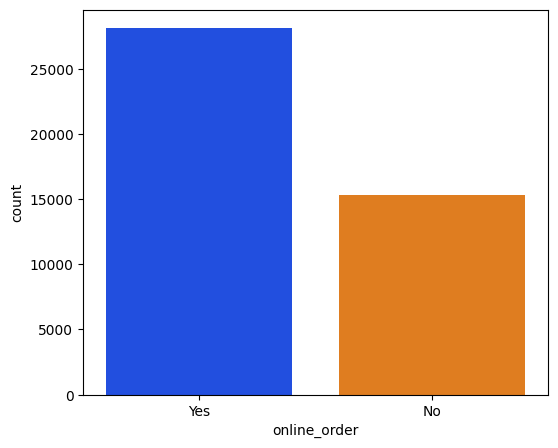

In [122]:
plt.figure(figsize=(6,5))
sns.countplot(x='online_order',data=df,palette ='bright') # countplot gives us count of the values
plt.show()

##### By observing the graph, we can say that 25000+ restaurants are accepting online order for zomato and 15000 restaurants not accepting online orders.
##### If you want the same in perecentages you can use pie chart

<Axes: ylabel='count'>

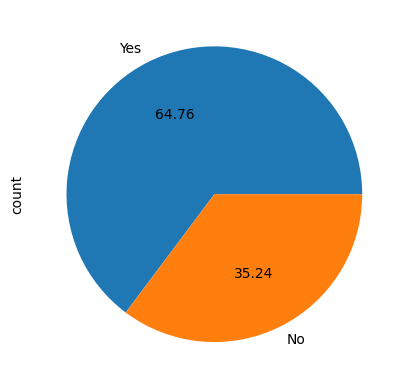

In [123]:
df['online_order'].value_counts().plot(kind='pie',autopct='%.2f')

### 2. Is table booking available for dine in ?

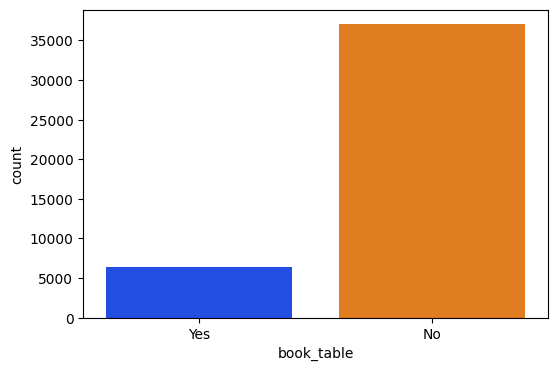

In [124]:
plt.figure(figsize=(6,4))
sns.countplot(x='book_table',data=df,palette ='bright') # countplot gives us count of the values
plt.show()

##### More than 35000 restaurants did not have table booking for dine in and only 5000-60000 have table booking for dine in

<Axes: ylabel='count'>

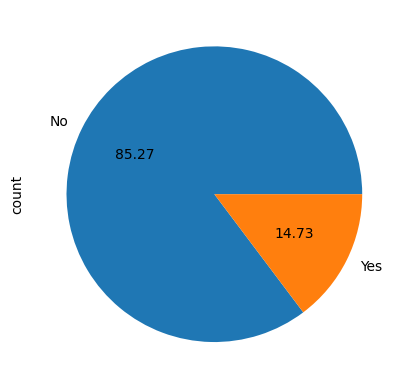

In [125]:
df['book_table'].value_counts().plot(kind='pie',autopct='%.2f')

#### 3. Cost's of Restaurants

(array([3.9733e+04, 3.2760e+03, 4.0500e+02, 3.6000e+01, 3.0000e+00]),
 array([  40., 1232., 2424., 3616., 4808., 6000.]),
 <BarContainer object of 5 artists>)

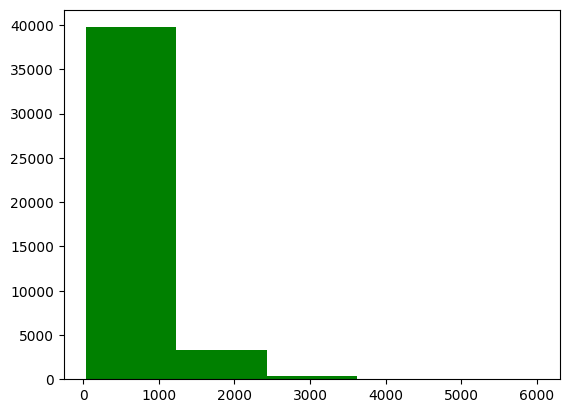

In [126]:
plt.hist(df['cost'], bins=5,color='green')

<Axes: xlabel='cost', ylabel='Density'>

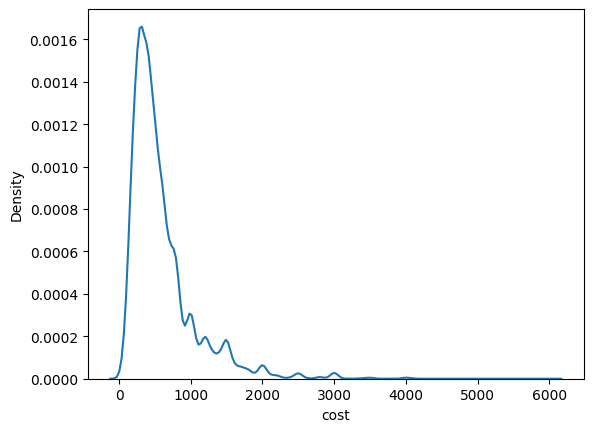

In [127]:
sns.kdeplot(df['cost'])

##### from histograms and kdeplot we can see that the cost of the most resturants ranges between 1-1000 for food and remaining restaurants more than 2000

<Axes: xlabel='rating', ylabel='Count'>

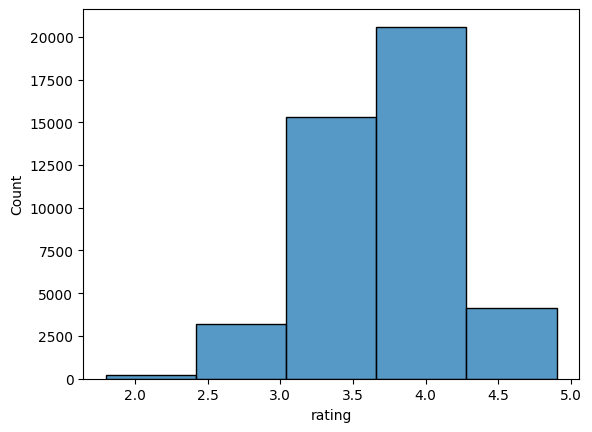

In [128]:
sns.histplot(df['rating'],bins=5)

##### From the histogram we observe that most restaurants are rated above 4

<Axes: xlabel='rating', ylabel='Density'>

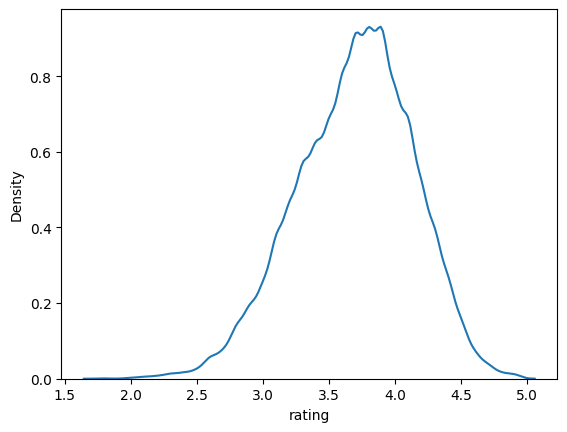

In [129]:
sns.kdeplot(df['rating'])

##### From the kdeplot we can observe that most restaurants have ratings ranged 3.0 - 4.5

<Axes: xlabel='cost'>

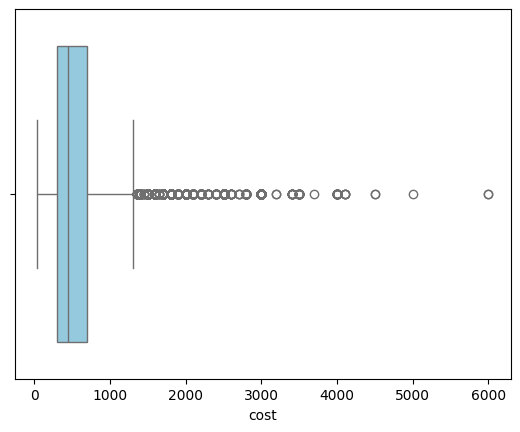

In [130]:

sns.boxplot(df['cost'],color='skyblue',orient='h')

### Bivariate Analysis

##### 1. Types of Restaurant and their count 

(np.int64(87), <Axes: xlabel='restaurants', ylabel='rest_type'>)

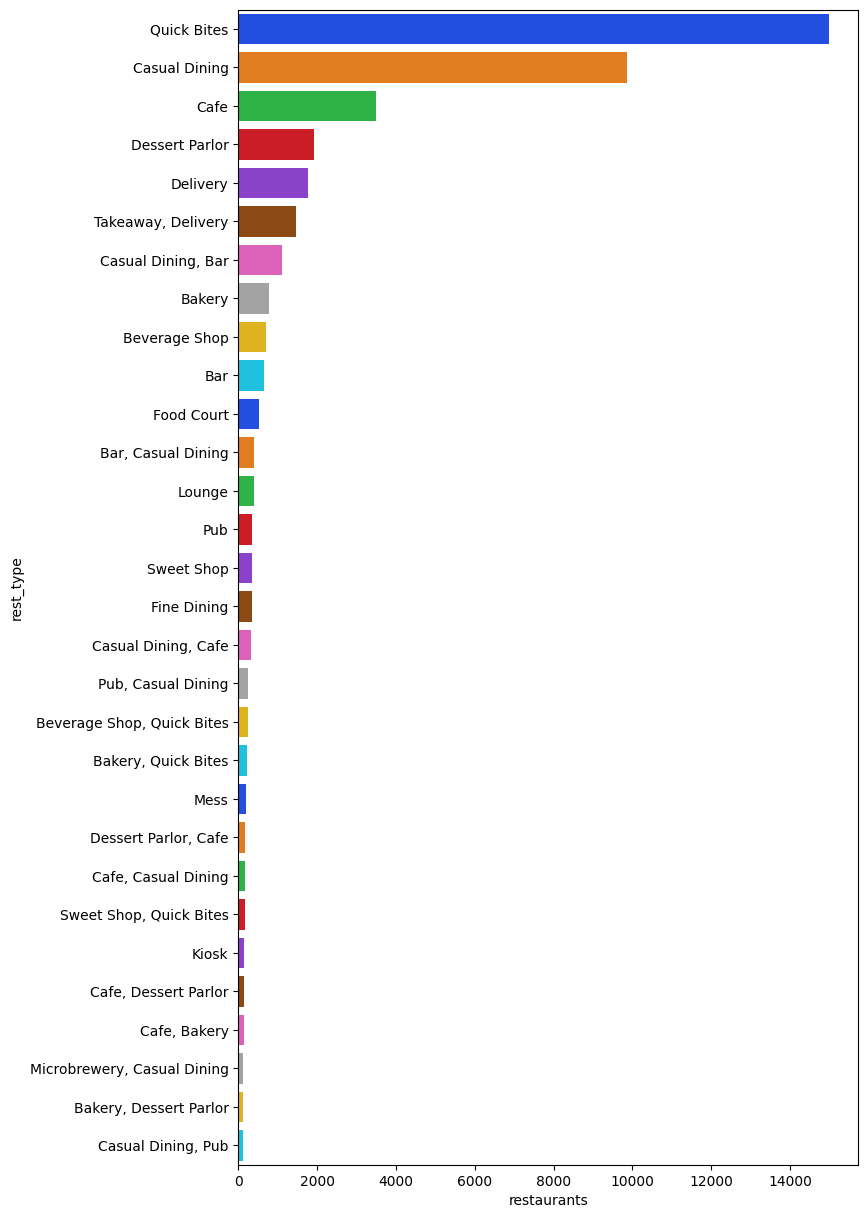

In [131]:
plt.figure(figsize=(8,15))
rest_types=df.groupby('rest_type')['restaurants'].count().reset_index()# grouping restaurants types and getting 'restaurant' count
sorted_rest_types=rest_types.sort_values('restaurants',ascending=False).head(30) # sorting restaurant types on 'restaurants' counts in descending order and reading 40 values
rest_types.rest_type.count(),sns.barplot(x='restaurants',y='rest_type',data=sorted_rest_types,orient='h',palette='bright')# drawing horizontal bar plot to see results

##### From the barplot 
1) There 14000 restaurants of type 'quick bite'
2) There are 10000 restaurants of  type 'casual Dining' and so on

#### 2. Number of  Restaurants at given Location

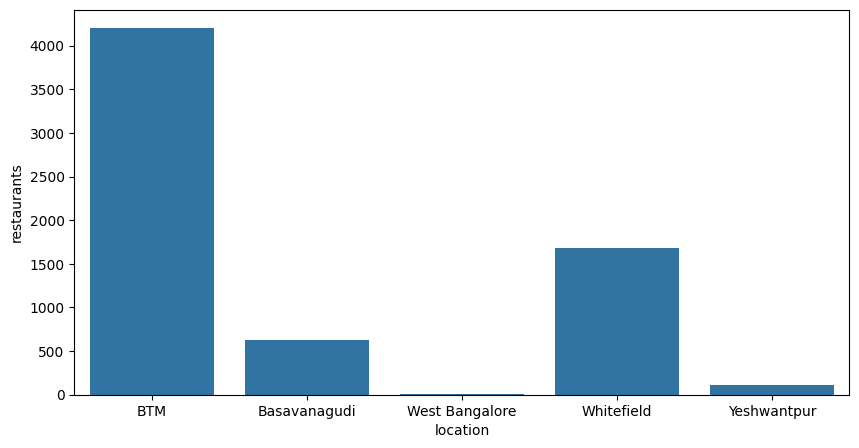

In [141]:
df1=pd.DataFrame(df.groupby('location')['restaurants'].count()).reset_index()
criteria=df['location'].isin(['BTM','Basavanagudi','West Bangalore','Whitefield','Yeshwantpur']) # selecting given locations from dataset using isin()
plt.figure(figsize=(10,5)) 
sns.barplot(x='location',y='restaurants',data=df[criteria])
plt.show()

1) BTM Location has 4000+ restaurants
2) Whitefield location has 1500+ restaurants
3) Basavanagudi has 500+ restaurants

In [143]:
df_2 = pd.read_csv('zomato_clean_data.csv')

In [144]:
df_2.head()

,Unnamed: 0,restaurants,online_order,book_table,rating,votes,location,rest_type,food_type,cost,type,city
0,0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


#### Find the how many Restaurants havign Chinese and North Indian food in their food type

In [145]:
Chinese=len([i for i in df_2['food_type'] if 'Chinese' in i]) # count of restaurants who serving chinese food.
North_India=len([i for i in df_2['food_type'] if 'North India' in i]) # count of restaurants who serving North Indian food.
Restaurant_count=[Chinese,North_India] #creating list
Food_Type=['Chinese','North India']
df3 = pd.DataFrame({'Food_Type':Food_Type,'Restaurant_count':Restaurant_count})#.set_index('Food_Type')# creating dataset of extracted data

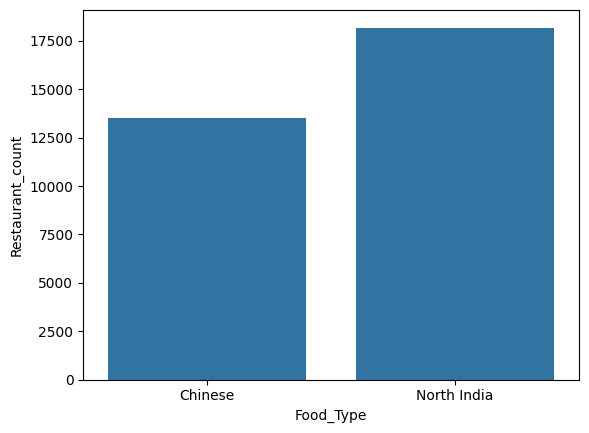

In [146]:
sns.barplot(x='Food_Type',y='Restaurant_count',data=df3) # countplot gives us count of the values
plt.show()

#### Find the most profitable type of restaurant.

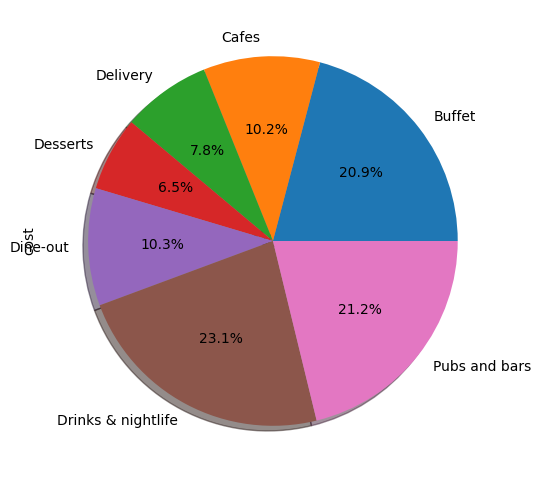

In [148]:
df4=df_2.groupby('type').agg({'cost':'mean'})
df4.cost.plot(kind='pie',autopct='%1.1f%%',figsize=(6,6),shadow=True)
plt.show()

##### Here, by seeing the total percentage of average cost we can observe that. The restaurants having Drink and Nightlife facility are in high profit than other types.

### Multivariate Analysis

1)  Find most famous restaurants chains(like Franchise(Restaurants having more than one branch)) in Bangalore.
We working on a zomato dataset of bangalore location so we can asume that all locations are belongs to bangalore.

In this problem we need to find restaurant at each location having more than 1 branch and high rating.

In [153]:
df_6=pd.DataFrame(df_2.groupby(['location','restaurants','rating']).count()).reset_index() # getting location,restraunts and rating and their count of restaurants
df_6

,location,restaurants,rating,Unnamed: 0,online_order,book_table,votes,rest_type,food_type,cost,type,city
0,BTM,100C,3.7,3,3,3,3,3,3,3,3,3
1,BTM,2nd Home Restaurant,3.7,11,11,11,11,11,11,11,11,11
2,BTM,36th Cross Coffee Mane,3.7,1,1,1,1,1,1,1,1,1
3,BTM,"3B's - Buddies, Bar & Barbecues",4.4,13,13,13,13,13,13,13,13,13
4,BTM,A2B - Adyar Ananda Bhavan,3.8,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
12577,Yeshwantpur,The Cupcake Story,3.5,1,1,1,1,1,1,1,1,1
12578,Yeshwantpur,The Duke Of Juices,3.3,1,1,1,1,1,1,1,1,1
12579,Yeshwantpur,Tuckinto,3.8,2,2,2,2,2,2,2,2,2
12580,Yeshwantpur,Udupi Garden,3.0,2,2,2,2,2,2,2,2,2


1) Note that all columns having some count values these are nothing but a count of that restaurant at given location.

We can see some restaurants having 1 count and some having more than 1. We want that restaurants which having more than 1 count and high rating.

In [161]:
chains_restaurants = df_6[df_6['book_table'] > 1]
famous_restaurants = pd.DataFrame(chains_restaurants.groupby('location')[['restaurants', 'rating']].max()).reset_index()
famous_restaurants


,location,restaurants,rating
0,BTM,eat.fit,4.9
1,Banashankari,Yo Roll Corner,4.6
2,Banaswadi,Zam Zam Restaurant,4.0
3,Bannerghatta Road,Zhangs Classic,4.6
4,Basavanagudi,Zephyr,4.6
...,...,...,...
84,West Bangalore,FreshMenu,3.3
85,Whitefield,nu.tree,4.9
86,Wilson Garden,Vijaya Sagar,4.0
87,Yelahanka,Prashanth Naati Corner,3.9


1) Finally, we got restaurant at each location has more that one branch and highest rating. Total 89 result we got.

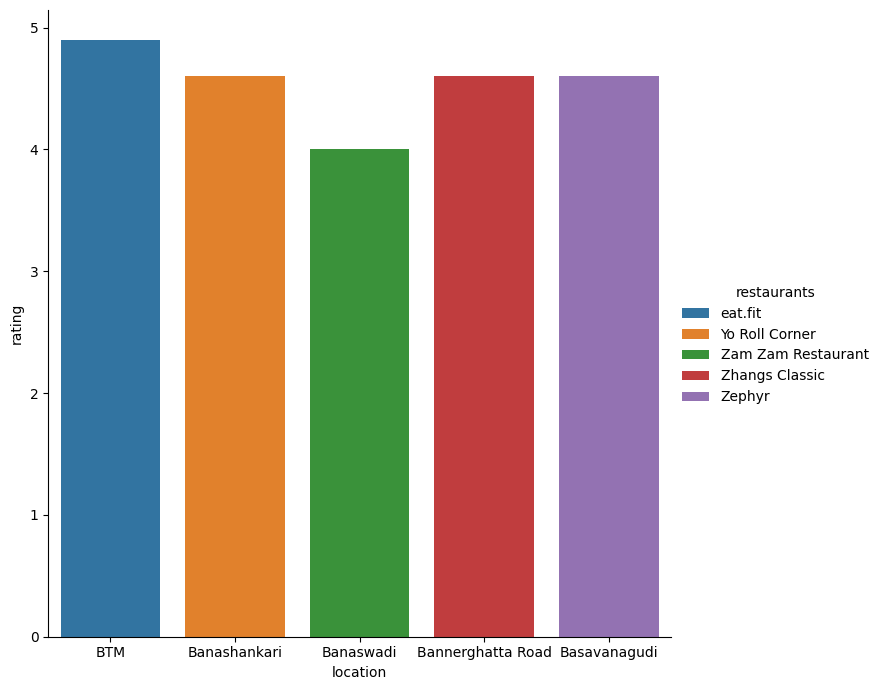

In [162]:
sns.catplot(x="location", y="rating", hue="restaurants",kind='bar',height=7,data=famous_restaurants.head(5))

1) Here we can see that famous restaurant having more that one branch at location and their rating as well.

2) We can say that, at BTM location in bangalore "eat.fit" restaurant is a famous restaurant franchise having maximum rating(4.9) compare to other restaurants franchise's at same location.

3) At Banashankari location in bangalore "Yo Roll Corner" restaurant is a famous restaurant franchise having maximum rating(4.6) compare to other restaurants franchise's at same location.

4) At Banaswadi location in bangalore "Zam Zam Restaurant" restaurant is a famous restaurant franchise having maximum rating(4.0) compare to other restaurants franchise's at same location. 